#**Regressão Linear Simples - Previsão de Custos Plano de Saúde**

In [4]:
#**Importando as bibliotecas necessárias**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn.model_selection import train_test_split # Separa os dados em treino e teste
from sklearn.linear_model import LinearRegression # Algoritmo de regressão linear
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Métricas de validação do modelo

#**Explorando os dados**

In [6]:
# Carregando a base de dados
dados = pd.read_csv('insurance_idade_encargos.csv')

# Visualizar as primeiras linhas dos dados
print(dados.head())

   idade     encargos
0     19  16884.92400
1     18   1725.55230
2     28   4449.46200
3     33  21984.47061
4     32   3866.85520


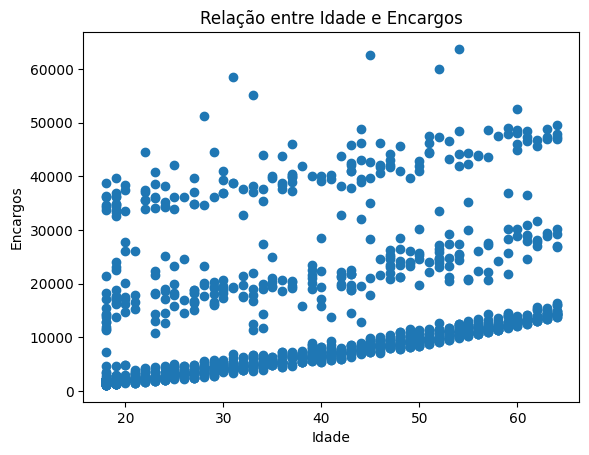

In [7]:
# Visualizando os dados (Gráfico Dispersão)
plt.scatter(dados['idade'], dados['encargos'])
plt.xlabel('Idade')
plt.ylabel('Encargos')
plt.title('Relação entre Idade e Encargos')
plt.show()

# Mesmo buscando uma correlação entre duas variáveis, idade e encargos, que a princípio apresentariam uma correlação alta, os dados no gráfico se apresentam bastante dispersos, não indicando assim o uso da regressão linear simples
## Referências:
> Machine Learning: Aula2 - Vídeo 01 (Regressão Linear - I)

In [8]:
dados.corr()

,idade,encargos
idade,1.000000,0.299008
encargos,0.299008,1.000000


In [9]:
# Dividindo os dados em conjuntos de treinamento e teste
X = dados[['idade']]  # Recurso (variável independente)
y = dados['encargos']  # Rótulo (variável dependente)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape

(1070, 1)

In [11]:
X_test.shape

(268, 1)

In [12]:
# Criando e treinando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train) #Treinar o modelo

# Fazendo previsões no conjunto de teste
previsoes = modelo.predict(X_test)

In [13]:
print(previsoes)

[14703.77387469 12538.40483659 19275.10851067 14944.37043448
  8448.26332018 12057.21171701  8448.26332018 19275.10851067
 10613.63235828 15666.16011384 11094.82547785 13741.38763553
 10854.22891807 14944.37043448 18312.72227152 15184.96699426
 15666.16011384 15184.96699426 14944.37043448 14222.58075511
  9891.84267891 14222.58075511  8448.26332018  9170.05299954
 15906.75667363 16869.14291279 18312.72227152 10373.03579849
 15184.96699426  8207.66676039 13500.79107574 17590.93259215
  8929.45643976 11094.82547785 10132.4392387  14703.77387469
  8929.45643976 14222.58075511 16387.94979321 12538.40483659
  8448.26332018  9170.05299954 17350.33603236 18072.12571173
 11816.61515722 18072.12571173  8929.45643976  9891.84267891
 14222.58075511 11335.42203764 19034.51195088  8207.66676039
 13500.79107574  8207.66676039 17350.33603236 15906.75667363
 11094.82547785 11335.42203764 17831.52915194 16628.546353
 19034.51195088 11094.82547785 18553.31883131 13981.98419532
 16387.94979321 10613.6323

# Avaliando os resultados ✅

Vamos avaliar o modelo com as seguintes métricas:

O **RMSE** é a raiz quadrada do **MSE** *(Erro Quadrático Médio - Mean Squared Error)*. o **MSE** é a média dos quadrados das diferenças entre os valores reais e os valores previstos.

O **MAE** *(Erro Médio Absoluto - Mean Absolute Error)*, onde um valor pequeno para MAE significa que suas previsões estão próximas das reais.

O **"R-squared (R2)"** fornece informações sobre o ajuste geral do modelo. O valor do R2 pode variar entre 0 e 1, quanto mais próximo de 1, melhor, pois indica que o modelo explica uma maior proporção da variabilidade nos dados. O R2 é também uma das principais métricas de avaliação do modelo de regressão.

Erro Médio Quadrático (RMSE): 135983957.4805469
Erro Absoluto Médio (MAE): 9173.258196746589
R² (coeficiente de determinação) (R-squared)(R2): 0.12408973539501944


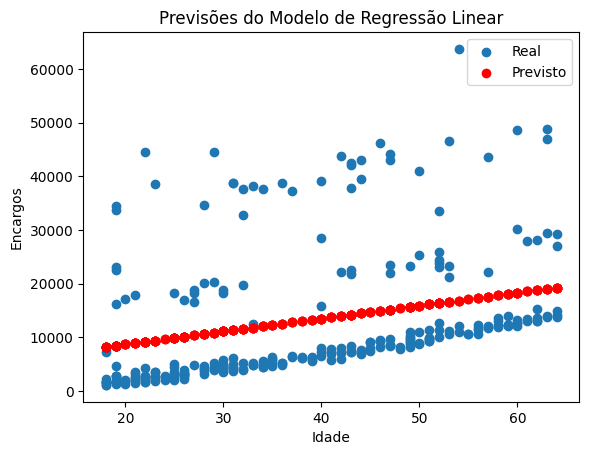

In [14]:
# Avaliando o desempenho do modelo
erro_medio_quadratico = mean_squared_error(y_test, previsoes)
erro_absoluto_medio = mean_absolute_error(y_test, previsoes)
r_quadrado = r2_score(y_test, previsoes)

print(f'Erro Médio Quadrático (RMSE): {erro_medio_quadratico}')
print(f'Erro Absoluto Médio (MAE): {erro_absoluto_medio}')
print(f'R² (coeficiente de determinação) (R-squared)(R2): {r_quadrado}')

# Visualizando as previsões
plt.scatter(X_test, y_test, label='Real')
plt.scatter(X_test, previsoes, label='Previsto', color='red')
plt.xlabel('Idade')
plt.ylabel('Encargos')
plt.title('Previsões do Modelo de Regressão Linear')
plt.legend()
plt.show()